### Part 3: Choosing The Treasures

#### **Problem Description:**

Algo Jones have 120 possible 3-digit lock combination to try, but fortunately, he manages to open the lock on his 20th try. He found several treasure items in the chest and a couple of letters. He was carrying a bag but he knows he could not fit all of the treasures in his bag which can only carry up to 10kg, but he must choose the most precious one first and come back for the rest later. After evaluating all the items, he came out with an assessment list for all the items (Table 1).

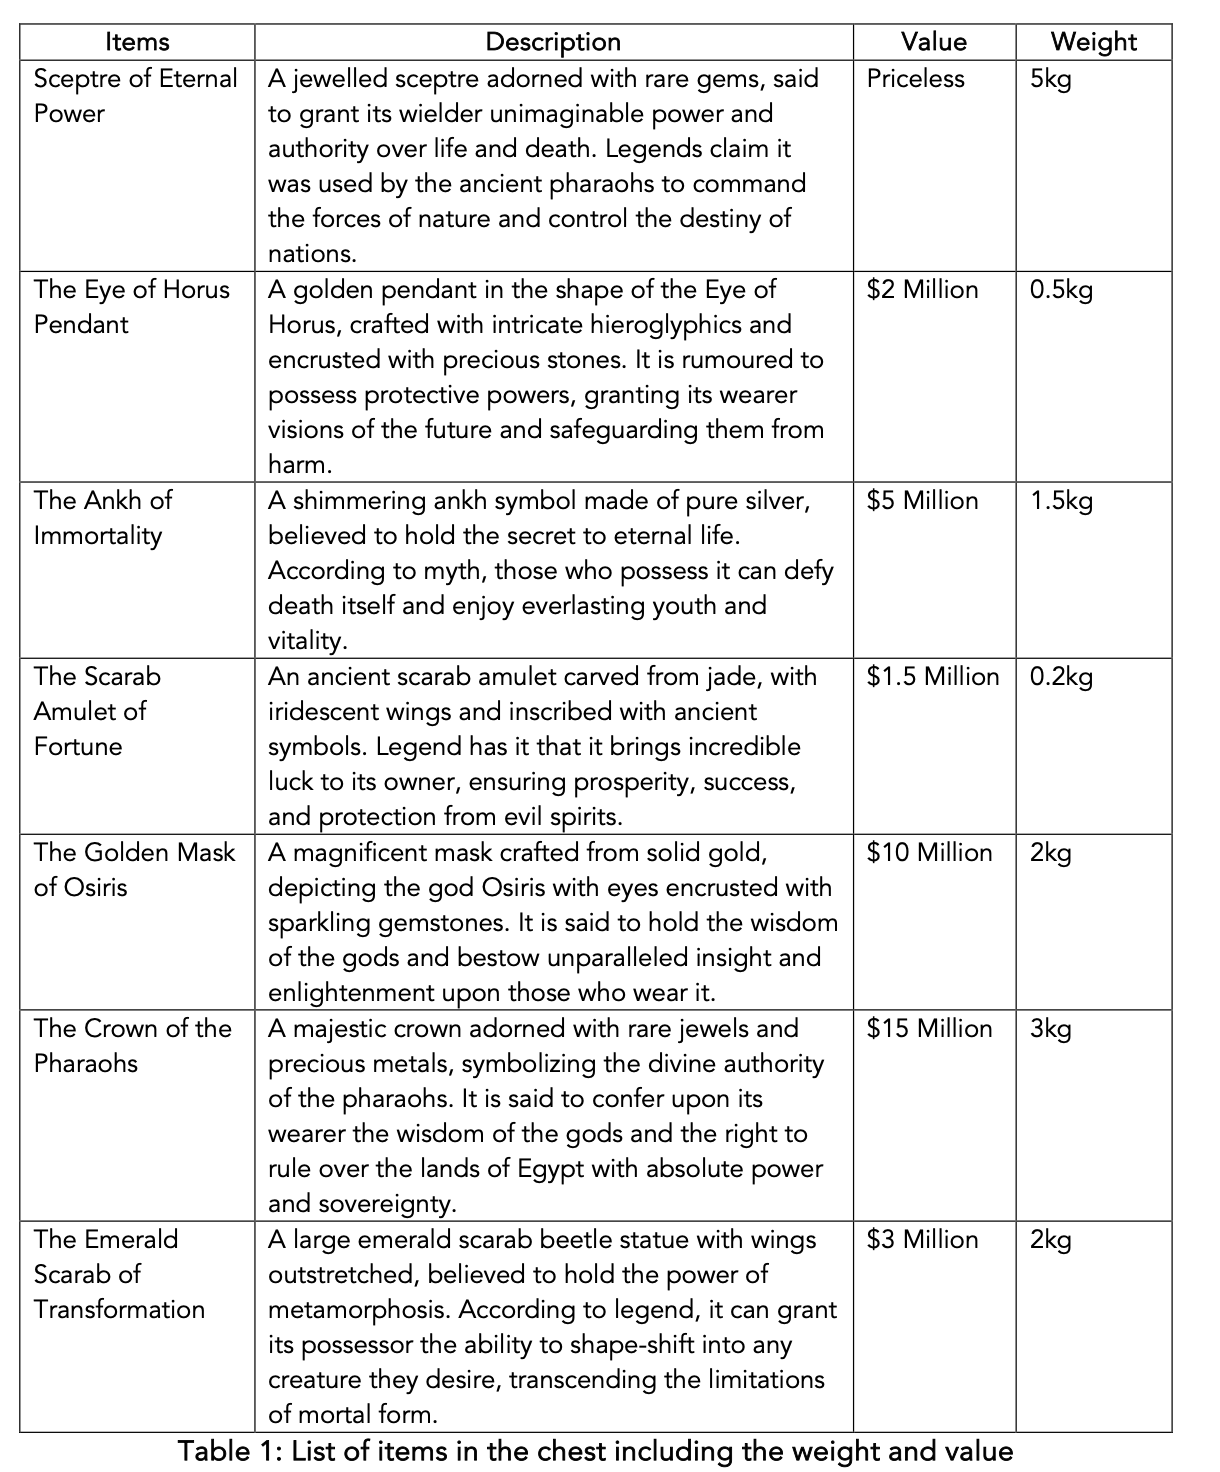

**Problem:**
Which items should he carry out in his bag first?

#### **Brainstorming**
This is a knapsack problem where the task is to put the items into the bag such that the sum of values associated with them is the maximum possible. Given there’s only 10 kg of capacity, we have to find the most suitable combination of items that contains the highest possible worth for Algo Jones to carry back. At the same time, we have to consider the item's weight so that the total sum of the items’ weight does not exceed the maximum capacity (10kg). Therefore, we have to identify items that are relatively lightweight and have high value at the same time. 

**Assumption**: We assume that “priceless” in the value category has the highest value and  assign it to a value of $20 million.

**Constraints**: We can either put an item completely into the bag or cannot put it at all (It is not possible to put a part of an item into the bag)


##### **Brute force algorithm**:


**1. Define the items’ weight and their value**: Create a list of items where each item is represented as a tuple containing the weight and the item name.
Set the bag capacity: Determine the maximum weight the bag can carry.

**2. Generate all possible subsets**: Iterate through all possible combinations of items which use the combinations functions. The subsets can range from one single item to many items.

**3. Check the weight and value of each subset**: For each subset, calculate the total weight and total value by summing the weights and value of the items in the subset respectively.

**4. Compare the weight and value with the bag capacity and current maximum value subset**: If the total weight of the subset is less than or equal to the bag capacity, compare with the current subset that has the maximum value. If the value of the subset is greater than the current maximum value subset, then update the current maximum value and the corresponding subset if it surpasses the previous maximum value.

**5. Return the most suitable subset**: After examining all possible subsets, return the subset with the maximum value that satisfies the bag’s maximum capacity.





##### **Greedy Algorithm**:

**1. Sort the items by value as top priority, followed by weight**: Arrange the items in descending order based on their value as we want to take items with higher value first. This sorting step is crucial for the greedy algorithm to work effectively.

**2. Initialize an empty set of selected items**: create a variable to store the selected items that will be carried on the bag.

**3. Iterate through the sorted items**: Start iterating through the sorted items in order of their weights.

**4. Select the item if it fits within the bag’s capacity**: For each item, check if adding to the set of selected items would exceed the bag’s capacity. If adding the item does not exceed the capacity, include it in the set of selected items.

**5. Check if the bag is full**: After each item selection, check if the total weight of the selected items reaches or exceeds the bag’s capacity (10kg). If it does, stop the iteration.
Output the selected item(s): Once the iteration is complete, the set of selected items represents the items carried on the bag.





##### **Dynamic Programming**:

**1. Define the subproblem**: Identify the subproblem and the associated parameters that will be used to construct a solution for the larger problem. In this case, the subproblem can be defined as finding the maximum weight and maximum value that can be carried using a subset of items up to a certain index.

**2. Sort the items descending according to their value**: As we wish to take up items that have high value, we should sort the items by their value from highest to lowest so that we will take the most valuable item first.

**3. Create a table to store the results**: Initialize a table (often referred to as a memoization table) to store the maximum weight that can be carried for different indices.

**4. Fill in the table using recurrence solution**: Use a recurrence relation to fill in the table based on previously computed values. The recurrence relation should consider two possibilities: including the current item or excluding it, and choose the maximum weight between the two options.

**5. Retrieve the solution**: Once the table is filled, the maximum weight that can be carried using the available items can be obtained from the value stored in that table at the last index.

**6. Backtrack to determine the selected items**: If necessary, we can perform a backward traversal of the table to determine the specific items that were selected to achieve the maximum weight.


#### **Comparison of Algorithms**

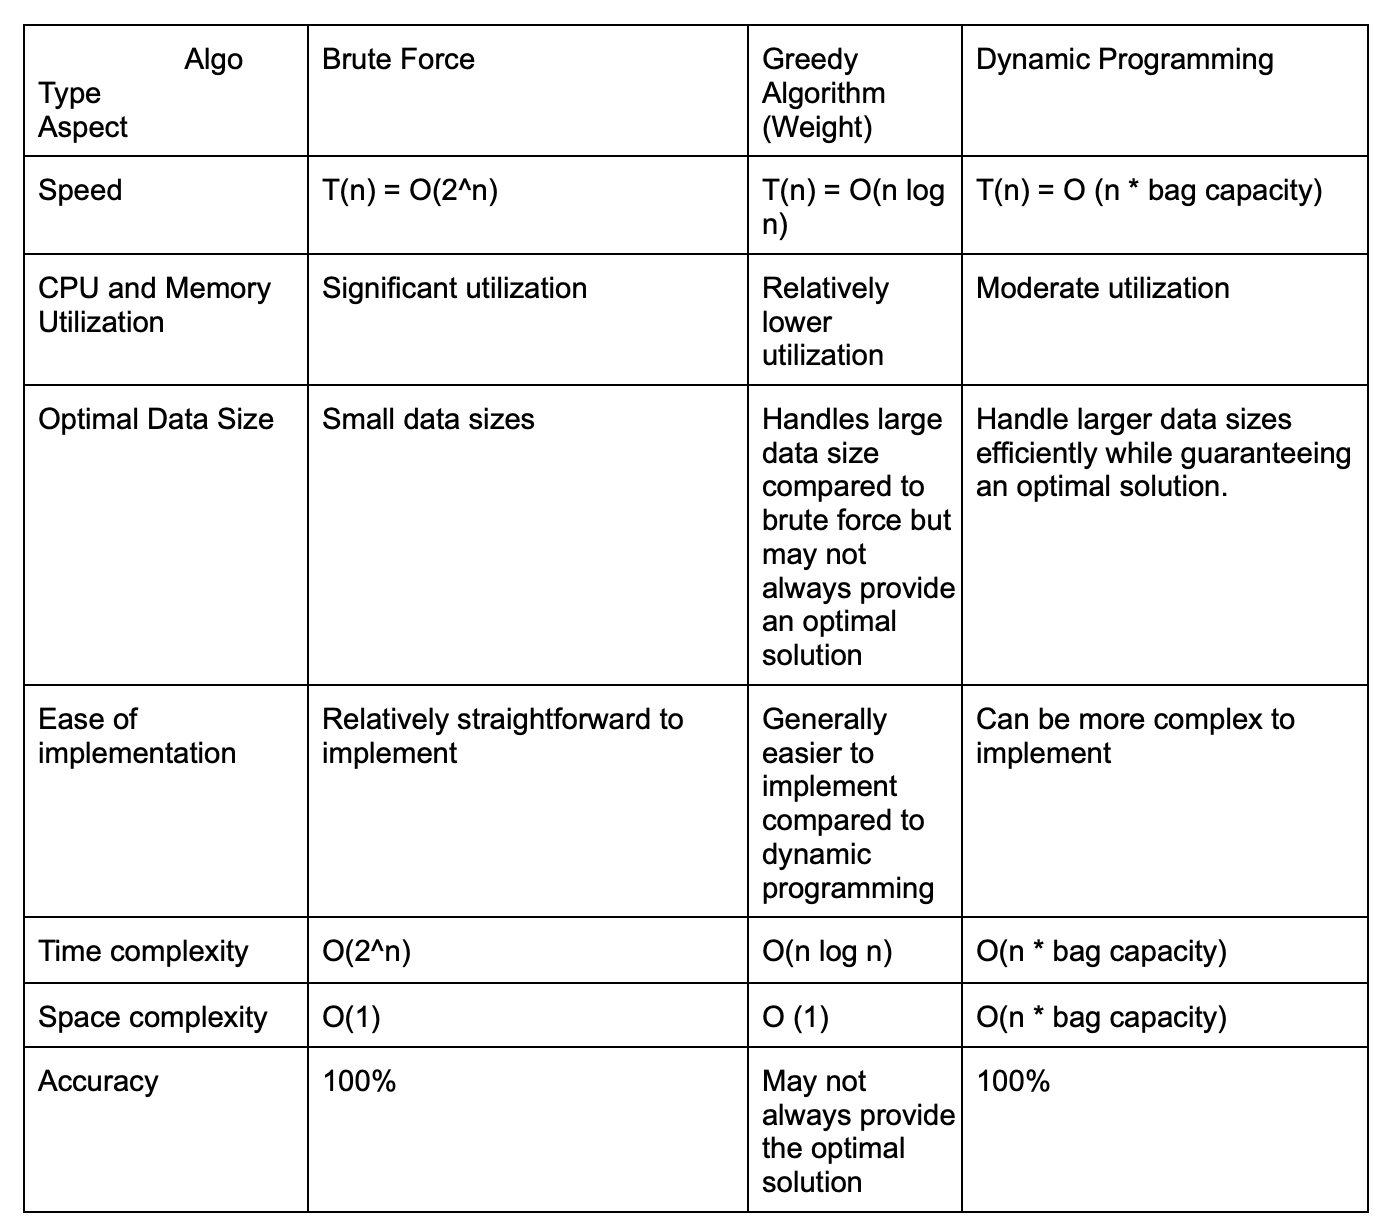

#### **Selection**

In this problem, dynamic programming is used because it provides a good balance between speed, memory utilization, and accuracy. It efficiently handles larger data sizes while guaranteeing the optimal solution. Although it may require more effort to implement compared to the other algorithms, the benefits in terms of efficiency and accuracy make it the preferred choice.

#### **Running time complexity**

- The running time complexity of the dynamic programming is O (n * bag_capacity), where n is the number of items and bag_capacity is the maximum capacity of the bag.
- The outer loop iterates over each item, which takes O(n) time. The inner loop iterates from 1 to bag_capacity which takes O(bag_capacity) time. Thus, the overall time complexity is O(n * bag_capacity)
- In terms of the number of operations performed, the code fills a 2D table of size (n+1) x (bag_capacity + 1), where each cell is updated once. Therefore, the number of operations is proportional to the product of n and bag_capacity.




#### **Pseudocode**
1. Given a list of items with their weight and value, sort the list of items in descending order by the value of items. Assign the sort list of items in variable T.

2. Define a function named find_subset_dynamic that takes two parameters: items (a list of items with their weight and value) and bag_capacity (the maximum capacity of the bag).

3. Calculate the length of the items list and assign it to the variable n, representing the number of items.

4. Create a two-dimensional array named dp with dimensions (n+1) by (bag_capacity + 1). It is initialized with zeros and will be used to store the maximum weights that can be achieved for different subsets of items.

5. Create Another Two-dimensional array named with the same dimensions as dp. It is initialized with empty strings and will be used to store the names of the items included in the subsets.

6. Implement the dynamic programming approach. It uses Nested Loops To Iterate over each item and bag capacity combination. For each combination, it checks if including the current item would result in a higher weight than not including it. If so, it updates the dp array with the new maximum weight and stores the item's name in the names array. 
Otherwise, it carries forward the previous maximum weight and corresponding item name.

7. Trace back the items included in the subset that resulted in maximum weight. It starts from the bottom-right corner of the names array and iteratively adds the item names to the subset list while subtracting the item's weight from the bag capacity. The loop continues until it reaches the top-left corner or exhausts the items.
Return the final sub setlist, which contains the names of the items that form the subset with the maximum weight within the bag's capacity.


#### **Implementation**

In [3]:
def knapsack(items, capacity, scale_factor):
    n = len(items)
    # Initialize table with zeros
    table = [[0] * (capacity + 1) for _ in range(n + 1)]
    
    # Fill in the table
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            weight = int(items[i - 1][2] * scale_factor)
            
            value = items[i - 1][1]
            if weight <= w:
                table[i][w] = max(table[i - 1][w], table[i - 1][w - weight] + value)
            else:
                table[i][w] = table[i - 1][w]

    # Trace back to find items chosen
    chosen_items = []
    w = capacity
    for i in range(n, 0, -1):
        if table[i][w] != table[i - 1][w]:
            chosen_items.append(items[i - 1])
            w -= int(items[i - 1][2] * scale_factor)  # Convert decimal weight to integer

    return table[n][capacity], chosen_items


#### **Driver Code**

In [4]:
# Define the items (value, weight)
items = [
    ("Sceptre of Eternal Power", 16.5, 5),
    ("The Eye of Horus Pendant", 2, 0.5),
    ("The Ankh of Immortality", 5, 1.5),
    ("The Scarab Amulet of Fortune", 1.5, 0.2),
    ("The Golden Mask of Osiris", 10, 2),
    ("The Crown of the Pharaohs", 15, 3),
    ("The Emerald Scarab of Transformation", 3, 2)
]

# Sort items by value (descending order)
items.sort(key=lambda x: x[1], reverse=True)

# Capacity of the bag
capacity = 10
scale_factor = 10  # Adjust the scale factor based on the precision needed

# Adjust the maximum capacity based on the scale factor
adjusted_capacity = capacity * scale_factor

# Ensure that adjusted capacity does not exceed the maximum capacity of the knapsack
if adjusted_capacity > 100:  # Assuming maximum capacity of 100
    adjusted_capacity = 100

# Solve the knapsack problem
max_value, chosen_items = knapsack(items, adjusted_capacity, scale_factor)

# Print the result

print("Algo Jones should bring:")
for item in chosen_items:
    print("- {}: ${} million".format(item[0], item[1]))
print("Total value: ${} million".format(max_value))

Algo Jones should bring:
- The Golden Mask of Osiris: $10 million
- The Crown of the Pharaohs: $15 million
- Sceptre of Eternal Power: $16.5 million
Total value: $41.5 million
